<a href="https://colab.research.google.com/github/manishhh45/coreAnimation/blob/main/Copy_of_Delirium_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre-processing of ICD codes using NLP

In [ ]:
pip install pandas numpy scikit-learn nltk

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('d_icd_diagnoses.csv')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Assuming 'df' is your DataFrame and 'long_title' is the column containing text data
text_corpus = df['long_title'].tolist()

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words=stopwords.words('english'))

# Fit and transform the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(text_corpus)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
delirium_keywords = ["delirium",
                     "mental confusion",
                     "cognitive impairment",
                     "Confusion",
                     "Agitation",
                     "Disorientation",
                     "Cognitive decline",
                     "Altered mental state",
                     "Impaired cognition",
                     "Cognitive dysfunction",
                     "Mental disturbance",
                     "Cognitive impairment",
                     "Mental disarray",
                     "Cognitive dysfunction",
                     "Cognitive deficit",
                     "Cognitive disturbance",
                     "Impaired attention",
                     "Impaired consciousness",
                     "Delusional thinking",
                     "Hallucinations",
                     "Fluctuating awareness",
                     "Cognitive fluctuations",
                     "Thought disorder",
                     "Attention deficit",
                     "Executive dysfunction",
                     "Memory loss",
                     "Inattention",
                     "Mental incoherence",
                     "Perceptual disturbances",
                     "Disorganized thinking",
                     "Clouded consciousness",
                     "Sleep disturbance",
                     "Restlessness",
                     "Combative behavior",
                     "Psychomotor agitation",
                     "Affective lability",
                     "Hyperactivity",
                     "Hypoactivity",
                     "Hyperalertness",
                     "Hypervigilance",
                     "Aggressive behavior",
                     "Disruptive behavior",
                     "Disturbed sleep patterns",
                     "Sepsis",
                     "Septicemia",
                     "Bacterial infection",
                     "Viral infection",
                     "Urinary tract infection",
                     "Pneumonia",
                     "Respiratory infection",
                     "Bloodstream infection",
                     "Infection-induced delirium",
                     "Inflammatory response",
                     "Fever",
                     "Elevated white blood cells",
                     "Elevated C-reactive protein",
                     "Elevated procalcitonin",
                     "Elevated interleukin levels",
                     "Infection-related encephalopathy",
                     "Systemic infection",
                     "Infection-related confusion",
                     "Infectious disease",
                     "Immune response",
                     "Infection-associated cognitive impairment",
                     "Infection-triggered delirium",
                     "Infection-induced cognitive dysfunction",
                     "Infection-induced mental status changes",
                     "Infection-related neurological symptoms"]
relevant_rows = df[df['long_title'].apply(lambda x: any(keyword in x for keyword in delirium_keywords))]

In [ ]:
# Regex
import re
relevant_codes = df[df['long_title'].str.contains('|'.join(delirium_keywords), flags=re.IGNORECASE)]

In [ ]:
relevant_codes

,icd_code,icd_version,long_title
1,01160,9,"Tuberculous pneumonia [any form], unspecified"
22,11505,9,"Infection by Histoplasma capsulatum, pneumonia"
105,4658,9,Acute upper respiratory infections of other mu...
106,48281,9,Pneumonia due to anaerobes
146,67020,9,"Puerperal sepsis, unspecified as to episode of..."
...,...,...,...
108093,J110,10,Influenza due to unidentified influenza virus ...
108094,J129,10,"Viral pneumonia, unspecified"
108099,J95851,10,Ventilator associated pneumonia
108322,O2393,10,Unspecified genitourinary tract infection in p...


In [ ]:
# Separate ICD-9 and ICD-10 codes based on the 'icd_version' column
icd9_codes = relevant_codes[relevant_codes['icd_version'] == 9]['icd_code'].tolist()
icd10_codes = relevant_codes[relevant_codes['icd_version'] == 10]['icd_code'].tolist()

print("ICD-9 Codes:", icd9_codes)
print("ICD-10 Codes:", icd10_codes)

ICD-9 Codes: ['01160', '11505', '4658', '48281', '67020', '78060', '390', '48289', '48811', '0023', '04189', '0821', '4820', '77182', '0651', '48232', '0389', '0820', '0871', '29212', '48241', '4843', '0031', '0658', '0383', '03842', '11595', 'V759', '0388', '2930', '4848', '485', '01161', '03810', '481', '99732', '0223', '0601', '2903', '51637', '0551', '06640', '486', '06642', '4659', '99932', '48239', '01165', '0382', '0659', '31401', '4803', '0653', '51636', '0269', '03812', '0419', '0787', '31400', '07989', '48242', 'V1261', '03849', '06641', '5990', '33183', '4801', '48282', '99731', '4809', '01162', '01163', '4380', '4846', '00322', '03841', '2931', '5732', '0662', '78063', '78064', '0650', '2982', '4830', '78050', '0029', '0730', '0848', '48231', '48881', 'V734', '0021', '0545', '48283', '0261', '27731', '4802', '48284', '4845', '51635', '5171', '99593', 'V044', '03840', '0663', '06649', '4829', '77181', '0782', '29281', '48230', '78062', '0654', '0661', '0879', '0609', '0660',

# Finding Subject ID and Hadmid

In [ ]:
data = pd.read_csv('diagnoses_icd.csv')

In [ ]:
# Filter data based on relevant ICD codes
relevant_data = data[
    data['icd_code'].isin(icd9_codes + icd10_codes)
]

In [ ]:
# Group data by HADM_ID
grouped_data = relevant_data.groupby('hadm_id')

# Create an empty list to store compiled data
compiled_data_list = []

In [ ]:
# Iterate through each group
for hadm_id, group in grouped_data:
    compiled_data_list.append(group)

# Concatenate compiled data into a new DataFrame
compiled_data = pd.concat(compiled_data_list)

In [ ]:
# Save compiled data to a new sheet or file
compiled_data.to_csv('compiled_data.csv', index=False)

In [ ]:
compiled_data

,subject_id,hadm_id,seq_num,icd_code,icd_version
2269,10039708,20093566,3,F10251,10
3332,10003400,20214994,9,2930,9
3352,10003400,20214994,5,99594,9
518,10008454,20291550,5,5990,9
4363,10002428,20321825,4,29281,9
...,...,...,...,...,...
2534,10037928,29802992,3,5990,9
989,10020944,29974575,1,03849,9
1009,10020944,29974575,14,5990,9
1011,10020944,29974575,4,4820,9


In [ ]:
compiled_data = compiled_data.drop(['seq_num', 'icd_version'], axis = 1)

In [ ]:
compiled_data

,subject_id,hadm_id,icd_code
2269,10039708,20093566,F10251
3332,10003400,20214994,2930
3352,10003400,20214994,99594
518,10008454,20291550,5990
4363,10002428,20321825,29281
...,...,...,...
2534,10037928,29802992,5990
989,10020944,29974575,03849
1009,10020944,29974575,5990
1011,10020944,29974575,4820


# Extracting columns from "Patients"

In [ ]:
df = pd.read_csv('patients.csv')

In [ ]:
df

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10014729,F,21,2125,2011 - 2013,NaN
1,10003400,F,72,2134,2011 - 2013,2137-09-02
2,10002428,F,80,2155,2011 - 2013,NaN
3,10032725,F,38,2143,2011 - 2013,2143-03-30
4,10027445,F,48,2142,2011 - 2013,2146-02-09
...,...,...,...,...,...,...
95,10004733,M,51,2174,2014 - 2016,NaN
96,10021118,M,62,2161,2014 - 2016,NaN
97,10018501,M,83,2141,2014 - 2016,NaN
98,10007058,M,48,2167,2014 - 2016,NaN


In [ ]:
# Let's not drop the patient who died - they might have had delirium before they died
df = df[df['dod'].isnull()]
df

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10014729,F,21,2125,2011 - 2013,NaN
2,10002428,F,80,2155,2011 - 2013,NaN
5,10037928,F,78,2175,2011 - 2013,NaN
6,10001725,F,46,2110,2011 - 2013,NaN
8,10008454,F,26,2110,2011 - 2013,NaN
...,...,...,...,...,...,...
95,10004733,M,51,2174,2014 - 2016,NaN
96,10021118,M,62,2161,2014 - 2016,NaN
97,10018501,M,83,2141,2014 - 2016,NaN
98,10007058,M,48,2167,2014 - 2016,NaN


In [ ]:
df = df.drop('dod', axis = 1)

In [ ]:
# Reading compiled_data
compiled_data = pd.read_csv('compiled_data.csv')

# Load patients data
patients_data = pd.read_csv('patients.csv', usecols=['subject_id', 'gender', 'anchor_age'])

In [ ]:
# Merging columns
merged_data = pd.merge(compiled_data, patients_data, on=['subject_id'], how='inner')

In [ ]:
merged_data

,subject_id,hadm_id,seq_num,icd_code,icd_version,gender,anchor_age
0,10039708,20093566,3,F10251,10,F,46
1,10039708,23819016,3,R6521,10,F,46
2,10039708,23819016,1,A4189,10,F,46
3,10039708,23819016,19,R410,10,F,46
4,10039708,25864431,5,J189,10,F,46
...,...,...,...,...,...,...,...
156,10016742,29281842,11,N390,10,F,58
157,10020944,29974575,1,03849,9,M,72
158,10020944,29974575,14,5990,9,M,72
159,10020944,29974575,4,4820,9,M,72


In [ ]:
merged_data = merged_data.drop(['seq_num', 'icd_version'], axis = 1)

In [ ]:
merged_data

,subject_id,hadm_id,icd_code,gender,anchor_age
0,10039708,20093566,F10251,F,46
1,10039708,23819016,R6521,F,46
2,10039708,23819016,A4189,F,46
3,10039708,23819016,R410,F,46
4,10039708,25864431,J189,F,46
...,...,...,...,...,...
156,10016742,29281842,N390,F,58
157,10020944,29974575,03849,M,72
158,10020944,29974575,5990,M,72
159,10020944,29974575,4820,M,72


In [ ]:
# Update the 'compiled_data' DataFrame with the merged data
compiled_data = merged_data

# Save the updated 'compiled_data'
compiled_data.to_csv('compiled_data.csv', index=False)

In [ ]:
compiled_data

,subject_id,hadm_id,icd_code,gender,anchor_age
0,10039708,20093566,F10251,F,46
1,10039708,23819016,R6521,F,46
2,10039708,23819016,A4189,F,46
3,10039708,23819016,R410,F,46
4,10039708,25864431,J189,F,46
...,...,...,...,...,...
156,10016742,29281842,N390,F,58
157,10020944,29974575,03849,M,72
158,10020944,29974575,5990,M,72
159,10020944,29974575,4820,M,72


# ICU Patients

In [ ]:
# Load your CSV file
df = pd.read_csv('compiled_data.csv')

# Check for null values in the DataFrame
null_values = df.isnull()

# Display the count of null values for each column
print(null_values.sum())

subject_id    0
hadm_id       0
icd_code      0
gender        0
anchor_age    0
dtype: int64


In [ ]:
df['icu'] = 0
df.to_csv('compiled_data.csv', index=False)

In [ ]:
df

,subject_id,hadm_id,icd_code,gender,anchor_age,icu
0,10039708,20093566,F10251,F,46,0
1,10039708,23819016,R6521,F,46,0
2,10039708,23819016,A4189,F,46,0
3,10039708,23819016,R410,F,46,0
4,10039708,25864431,J189,F,46,0
...,...,...,...,...,...,...
156,10016742,29281842,N390,F,58,0
157,10020944,29974575,03849,M,72,0
158,10020944,29974575,5990,M,72,0
159,10020944,29974575,4820,M,72,0


In [ ]:
# Finding icu stays
icustays = pd.read_csv('icustays.csv')

icu_hadmid = set(icustays['hadm_id'])

In [ ]:
df

,subject_id,hadm_id,icd_code,gender,anchor_age,icu
0,10039708,20093566,F10251,F,46,0
1,10039708,23819016,R6521,F,46,0
2,10039708,23819016,A4189,F,46,0
3,10039708,23819016,R410,F,46,0
4,10039708,25864431,J189,F,46,0
...,...,...,...,...,...,...
156,10016742,29281842,N390,F,58,0
157,10020944,29974575,03849,M,72,0
158,10020944,29974575,5990,M,72,0
159,10020944,29974575,4820,M,72,0


In [ ]:
df['icu'] = df['hadm_id'].apply(lambda x: 1 if x in icu_hadmid else 0)

df.to_csv('compiled_data.csv', index=False)

In [ ]:
df

,subject_id,hadm_id,icd_code,gender,anchor_age,icu
0,10039708,20093566,F10251,F,46,0
1,10039708,23819016,R6521,F,46,1
2,10039708,23819016,A4189,F,46,1
3,10039708,23819016,R410,F,46,1
4,10039708,25864431,J189,F,46,0
...,...,...,...,...,...,...
156,10016742,29281842,N390,F,58,1
157,10020944,29974575,03849,M,72,1
158,10020944,29974575,5990,M,72,1
159,10020944,29974575,4820,M,72,1


In [ ]:
# Convert 'intime' and 'outtime' columns to datetime objects

icustays['intime'] = pd.to_datetime(icustays['intime'], format='%d-%m-%Y %H:%M')
icustays['outtime'] = pd.to_datetime(icustays['outtime'], format='%d-%m-%Y %H:%M')

In [ ]:
# Calculate the ICU stay duration
icustays['icu_duration'] = (icustays['outtime'] - icustays['intime']).dt.days

In [ ]:
# Merge ICU stay duration based on HADM_ID
df = pd.merge(df, icustays[['hadm_id', 'icu_duration']], on='hadm_id', how='left')

In [ ]:
df.to_csv('compiled_data.csv', index=False)

In [ ]:
df

,subject_id,hadm_id,icd_code,gender,anchor_age,icu,icu_duration
0,10039708,20093566,F10251,F,46,0,NaN
1,10039708,23819016,R6521,F,46,1,1.0
2,10039708,23819016,A4189,F,46,1,1.0
3,10039708,23819016,R410,F,46,1,1.0
4,10039708,25864431,J189,F,46,0,NaN
...,...,...,...,...,...,...,...
176,10016742,29281842,N390,F,58,1,4.0
177,10020944,29974575,03849,M,72,1,9.0
178,10020944,29974575,5990,M,72,1,9.0
179,10020944,29974575,4820,M,72,1,9.0


In [ ]:
# Replace NaN values with 0 across all columns
df.fillna(0, inplace=True)

# Save the updated 'compiled_data' back to the same compiled_data.csv file
df.to_csv('compiled_data.csv', index=False)

In [ ]:
df

,subject_id,hadm_id,icd_code,gender,anchor_age,icu,icu_duration
0,10039708,20093566,F10251,F,46,0,0.0
1,10039708,23819016,R6521,F,46,1,1.0
2,10039708,23819016,A4189,F,46,1,1.0
3,10039708,23819016,R410,F,46,1,1.0
4,10039708,25864431,J189,F,46,0,0.0
...,...,...,...,...,...,...,...
176,10016742,29281842,N390,F,58,1,4.0
177,10020944,29974575,03849,M,72,1,9.0
178,10020944,29974575,5990,M,72,1,9.0
179,10020944,29974575,4820,M,72,1,9.0


# Adding Pharmacy Data

In [ ]:
pharmacy = pd.read_csv('pharmacy.csv')
pharmacy

,subject_id,hadm_id,pharmacy_id,poe_id,starttime,stoptime,medication,proc_type,status,entertime,...,basal_rate,one_hr_max,doses_per_24_hrs,duration,duration_interval,expiration_value,expiration_unit,expirationdate,dispensation,fill_quantity
0,10027602,28166872,24340150,NaN,2201-10-30 12:00:00,NaN,Midazolam,Miscellaneous Charges,Inactive (Due to a change order),2201-10-30 12:32:11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10027602,28166872,14435820,NaN,2201-10-30 12:00:00,NaN,Midazolam,Miscellaneous Charges,Inactive (Due to a change order),2201-10-30 12:54:34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10027602,28166872,40720238,NaN,2201-10-30 12:00:00,NaN,Fentanyl Citrate,Miscellaneous Charges,Inactive (Due to a change order),2201-10-30 12:32:11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10027602,28166872,27168639,NaN,2201-10-30 12:00:00,NaN,Fentanyl Citrate,Miscellaneous Charges,Inactive (Due to a change order),2201-10-30 12:54:34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10027602,28166872,62845687,NaN,2201-10-31 12:00:00,NaN,Lorazepam,Miscellaneous Charges,Inactive (Due to a change order),2201-10-31 12:02:42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15301,10014354,22508257,1794302,10014354-984,2148-05-16 13:00:00,2148-05-17 13:00:00,MoviPrep,Unit Dose,Discontinued,2148-05-16 12:05:01,...,NaN,NaN,2.0,2.0,Doses,365.0,Days,NaN,Omnicell,NaN
15302,10014354,22508257,33207382,10014354-992,2148-05-17 09:00:00,2148-05-18 05:00:00,MoviPrep,Unit Dose,Discontinued,2148-05-17 08:56:51,...,NaN,NaN,2.0,2.0,Doses,365.0,Days,NaN,Omnicell,NaN
15303,10014354,22508257,12690116,10014354-1000,2148-05-17 21:00:00,2148-05-18 05:00:00,MoviPrep,Unit Dose,Discontinued,2148-05-17 21:17:45,...,NaN,NaN,2.0,2.0,Doses,365.0,Days,NaN,Pharmacy Meds,NaN
15304,10014354,22508257,99002619,10014354-1001,2148-05-18 06:00:00,2148-05-18 08:00:00,MoviPrep,Unit Dose,Discontinued,2148-05-18 05:31:43,...,NaN,NaN,2.0,2.0,Doses,365.0,Days,NaN,Pharmacy Meds,NaN


In [ ]:
# Printing unique 'medication' values
values = pharmacy['medication'].unique()
values

array(['Midazolam', 'Fentanyl Citrate', 'Lorazepam', 'Propofol', nan,
       'Lidocaine Jelly 2% (Urojet)', 'Albumin 5% (25g / 500mL)',
       'Polyethylene Glycol', 'MoviPrep', 'Lidocaine Jelly 2% (Glydo)',
       'Vancomycin', 'Albumin 5%', 'Albumin 5% (12.5g / 250mL)',
       'Naproxen', 'Cyanocobalamin', 'Famotidine', 'Potassium Chloride',
       'Magnesium Citrate', 'Amitriptyline',
       'Latanoprost 0.005% Ophth. Soln.', 'Tamsulosin', 'Atorvastatin',
       'Mirtazapine', 'Insulin', 'Simvastatin', 'Amlodipine',
       'Olanzapine', 'Zolpidem Tartrate', 'Niacin SR', 'TraZODone',
       'traZODONE', 'Senna', 'Doxazosin', 'Donepezil',
       'OxyCODONE SR (OxyconTIN)', 'OLANZapine', 'Gabapentin',
       'Sodium Fluoride 1.1% (Dental Gel)', 'Albuterol Inhaler',
       'Docusate Sodium', 'Heparin', 'LevETIRAcetam', 'Raltegravir',
       'Calcium Carbonate', 'Rifaximin', 'LeVETiracetam',
       'Sulfameth/Trimethoprim DS', 'Docusate Sodium (Liquid)',
       'TiCAGRELOR', 'Metoprolol 

In [ ]:
# Unique frequency values
values = pharmacy['frequency'].unique()
values

array([nan, '1X', '2X', 'HS', 'X1', 'BID', 'PRN', 'Q2H', 'Q3H', 'Q4H',
       'Q6H', 'Q8H', 'QAM', 'QHS', 'QID', 'QPM', 'TID', 'DAYS', 'NOON',
       'ONCE', 'Q 8H', 'Q12H', 'Q24H', 'Q36H', 'Q48H', 'Q72H', 'QSAT',
       'QSUN', 'STAT', 'ASDIR', 'DAILY', 'LUNCH', 'MR X1', 'Q 12H',
       'Q 24H', 'QTHUR', 'QTUES', '3X/DAY', '5X/DAY', 'DINNER', 'HS:PRN',
       'NOW X1', 'X1 PRN', 'X1:PRN', 'X2 PRN', '1X/WEEK', '2X/WEEK',
       '3X/WEEK', '4X/WEEK', '5X/WEEK', '6X/WEEK', 'BID:PRN', 'DAILY16',
       'ON CALL', 'POST HD', 'Q1H:PRN', 'Q2H:PRN', 'Q3H:PRN', 'Q4H:PRN',
       'Q6H:PRN', 'Q8H:PRN', 'QHS:PRN', 'QID:PRN', 'QIDACHS', 'QMOWEFR',
       'QPM:PRN', 'TID:PRN', 'INFUSION', 'MRX1:PRN', 'ONCE MR1',
       'ONCE MR2', 'ONCE:PRN', 'Q12H:PRN', 'BREAKFAST', 'DAILY:PRN',
       'Q5MIN:PRN', 'Q15MIN:PRN', 'Q30MIN:PRN', 'TITRATE TO',
       'HD PROTOCOL', 'TID W/MEALS', 'EVERY OTHER DAY', 'TITRATE TO RASS',
       'ONCE PER LUMEN (2 LUMEN)', 'Q1H PER MOVIPREP PROTOCOL',
       'Q2H PER MOVIP

In [ ]:
# Filtering out data
d_meds = ['Midazolam',
'Fentanyl Citrate',
'Lorazepam',
'Propofol',
'Lidocaine Jelly 2% (Urojet)',
'Albumin 5% (25g / 500mL)',
'Polyethylene Glycol',
'MoviPrep',
'Potassium Chloride',
'Magnesium Citrate',
'Amitriptyline',
'Latanoprost 0.005% Ophth. Soln.',
'Tamsulosin',
'Atorvastatin',
'Mirtazapine',
'Insulin',
'Simvastatin',
'Sodium Fluoride 1.1% (Dental Gel)',
'Albuterol Inhaler',
'Docusate Sodium',
'Heparin',
'LevETIRAcetam',
'Raltegravir',
'Calcium Carbonate',
'Rifaximin',
'LeVETiracetam',
'Sulfameth/Trimethoprim DS',
'Docusate Sodium (Liquid)',
'TiCAGRELOR',
'Metoprolol Tartrate',
'Darunavir',
'Mupirocin Nasal Ointment 2%',
'Chlorhexidine Gluconate 0.12% Oral Rinse',
'CloniDINE',
'Dorzolamide 2%/Timolol 0.5% Ophth.',
'Furosemide',
'ClonazePAM',
'Ranitidine',
'Docusate',
'MetFORMIN (Glucophage)',
'Methadone',
'Fish Oil (Omega 3)',
'Docusate',
'Mupirocin Ointment 2%',
'Apixaban',
'Fluticasone-Salmeterol Diskus (100/50)',
'BusPIRone',
'Omeprazole',
'Topiramate (Topamax)',
'LaMOTrigine',
'Sotalol',
'Ciprofloxacin 0.3% Ophth Soln',
'PHENObarbital Alcohol Withdrawal Dose Taper (Days 2-7)',
'Carvedilol',
'Fluticasone Propionate 110mcg',
'Divalproex (DELayed Release)',
'QUEtiapine Fumarate',
'Divalproex Sod. Sprinkles',
'Spironolactone',
'Triamcinolone Acetonide 0.025% Cream']

In [ ]:
# Converting to one case
pharmacy['medication'] = pharmacy['medication'].str.lower()
d_meds = [med.lower() for med in d_meds]

In [ ]:
# List of acceptable frequencies
acceptable_frequencies = ['Q1H', 'Q2H', 'Q3H', 'Q4H', 'Q6H', 'Q8H', 'INFUSION']

In [ ]:
# Filter the table
filtered_table = pharmacy[
    (pharmacy['medication'].isin(d_meds))
    & (pharmacy['frequency'].isin(acceptable_frequencies))
]

In [ ]:
# Create a new DataFrame with 'subject_id', 'medication', 'frequency', and 'target' columns
new_dataframe = filtered_table[['subject_id', 'medication', 'frequency']].copy()

In [ ]:
new_dataframe

,subject_id,medication,frequency
2352,10037975,albuterol inhaler,Q2H
2354,10014354,magnesium citrate,Q2H
2361,10007818,lorazepam,Q3H
2364,10020740,lorazepam,Q3H
2365,10020740,lorazepam,Q3H
...,...,...,...
13979,10027445,furosemide,INFUSION
13980,10027445,furosemide,INFUSION
13989,10037928,insulin,INFUSION
13991,10038999,furosemide,INFUSION


In [ ]:
# Merge 'df' and 'new_dataframe' on 'subject_id'
merged_df = pd.merge(df, new_dataframe, on='subject_id', how='left')

In [ ]:
null_values = merged_df.isnull().sum()
null_values

subject_id       0
hadm_id          0
icd_code         0
gender           0
anchor_age       0
icu              0
icu_duration     0
medication      43
frequency       43
dtype: int64

In [ ]:
condition = ((merged_df['anchor_age'] > 75) | ((merged_df['icu'] == 1) & (merged_df['icu_duration'] > 2))) & \
            (~merged_df['medication'].isnull()) & (~merged_df['frequency'].isnull())

# Apply the condition to create a new column 'target' with 1 or 0
merged_df['target'] = condition.astype(int)

In [ ]:
merged_df

,subject_id,hadm_id,icd_code,gender,anchor_age,icu,icu_duration,medication,frequency,target
0,10039708,20093566,F10251,F,46,0,0.0,moviprep,Q4H,0
1,10039708,23819016,R6521,F,46,1,1.0,moviprep,Q4H,0
2,10039708,23819016,A4189,F,46,1,1.0,moviprep,Q4H,0
3,10039708,23819016,R410,F,46,1,1.0,moviprep,Q4H,0
4,10039708,25864431,J189,F,46,0,0.0,moviprep,Q4H,0
...,...,...,...,...,...,...,...,...,...,...
905,10020944,29974575,5990,M,72,1,9.0,fentanyl citrate,INFUSION,1
906,10020944,29974575,4820,M,72,1,9.0,fentanyl citrate,INFUSION,1
907,10020944,29974575,4820,M,72,1,9.0,fentanyl citrate,INFUSION,1
908,10020944,29974575,99592,M,72,1,9.0,fentanyl citrate,INFUSION,1


In [ ]:
#'hadmid' is the column based on which you want to keep unique values and 'target' is your target variable
sorted_df = merged_df.sort_values(by=['target'], ascending=False)

# Keep only the first occurrence of each 'hadmid' value after sorting
unique_df = sorted_df.drop_duplicates(subset='hadm_id')

# Display the resulting dataframe
print(unique_df)

     subject_id   hadm_id icd_code gender  anchor_age  icu  icu_duration  \
909    10020944  29974575    99592      M          72    1           9.0   
350    10014354  27487226     J189      M          60    1           3.0   
674    10020740  23831430    03842      M          56    1           4.0   
495    10018081  25973915     4380      M          79    0           0.0   
509    10018081  28861356     2930      M          79    1           2.0   
..          ...       ...      ...    ...         ...  ...           ...   
523    10023239  29295881      486      F          29    1           2.0   
524    10021487  21928381    04185      M          43    0           0.0   
529    10021487  27112038    04185      M          43    0           0.0   
516    10027602  21477991    31401      F          71    1           1.0   
514    10010471  21322534     J189      F          89    0           0.0   

              medication frequency  target  
909     fentanyl citrate  INFUSION       1

In [ ]:
# Remove rows with null values in specific columns
df_cleaned = unique_df.dropna(subset=['frequency', 'medication'])

# Print the updated DataFrame
print(df_cleaned)

     subject_id   hadm_id icd_code gender  anchor_age  icu  icu_duration  \
909    10020944  29974575    99592      M          72    1           9.0   
350    10014354  27487226     J189      M          60    1           3.0   
674    10020740  23831430    03842      M          56    1           4.0   
495    10018081  25973915     4380      M          79    0           0.0   
509    10018081  28861356     2930      M          79    1           2.0   
..          ...       ...      ...    ...         ...  ...           ...   
520    10019172  21540783    78062      F          63    0           0.0   
522    10023239  21759936   J15211      F          29    1           2.0   
523    10023239  29295881      486      F          29    1           2.0   
524    10021487  21928381    04185      M          43    0           0.0   
529    10021487  27112038    04185      M          43    0           0.0   

              medication frequency  target  
909     fentanyl citrate  INFUSION       1

# Model Building

**TabNet**

In [ ]:
!pip install pytorch_tabnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manyli

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from pytorch_tabnet.tab_model import TabNetClassifier

In [ ]:
data = df_cleaned.drop(['subject_id', 'hadm_id'], axis = 1)
data

,icd_code,gender,anchor_age,icu,icu_duration,medication,frequency,target
909,99592,M,72,1,9.0,fentanyl citrate,INFUSION,1
350,J189,M,60,1,3.0,metoprolol tartrate,Q6H,1
674,03842,M,56,1,4.0,fentanyl citrate,INFUSION,1
495,4380,M,79,0,0.0,metoprolol tartrate,Q6H,1
509,2930,M,79,1,2.0,fentanyl citrate,INFUSION,1
...,...,...,...,...,...,...,...,...
520,78062,F,63,0,0.0,insulin,INFUSION,0
522,J15211,F,29,1,2.0,insulin,INFUSION,0
523,486,F,29,1,2.0,insulin,INFUSION,0
524,04185,M,43,0,0.0,fentanyl citrate,INFUSION,0


In [ ]:
data['icu_duration'] = data['icu_duration'].astype(int)
data.dtypes

icd_code        object
gender          object
anchor_age       int64
icu              int64
icu_duration     int64
medication      object
frequency       object
target           int64
dtype: object

In [ ]:
icd_vectorizer = TfidfVectorizer(stop_words='english')
med_vectorizer = TfidfVectorizer(stop_words='english')
freq_vectorizer = TfidfVectorizer(stop_words='english')

In [ ]:
icd_code_features = icd_vectorizer.fit_transform(data['icd_code']).toarray()
medication_features = med_vectorizer.fit_transform(data['medication']).toarray()
frequency_features = freq_vectorizer.fit_transform(data['frequency']).toarray()

In [ ]:
# Preprocess categorical data
gender_encoder = OneHotEncoder(sparse=False)
gender_encoded = gender_encoder.fit_transform(data[['gender']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
print(icd_code_features.shape)
print(medication_features.shape)
print(frequency_features.shape)
print(gender_encoded.shape)
print(data[['anchor_age', 'icu_duration', 'icu']].values.shape)

(78, 36)
(78, 16)
(78, 6)
(78, 2)
(78, 3)


In [ ]:
trial = np.concatenate([icd_code_features, medication_features], axis=1)
print('Trial shape: ', trial.shape)

Trial shape:  (78, 52)


In [ ]:
# Combine features
all_features = np.concatenate([icd_code_features, medication_features, frequency_features,
                               gender_encoded, data[['anchor_age', 'icu_duration', 'icu']].values[:78, :]], axis=1)

print(all_features.shape)

(78, 63)


In [ ]:
# Target variable
target = data['target'].values

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(all_features, target, test_size=0.3, random_state=42)

In [ ]:
# Standardize numerical features
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = TabNetClassifier(
    optimizer_params=dict(lr=0.005, weight_decay=1e-3),  # Decreased learning rate and increased weight decay
    scheduler_params=dict(mode="cosine", patience=5, min_lr=1e-6, step_size=10),  # Adjusted patience and min_lr
    mask_type="sparsemax",
    input_dim=all_features.shape[1],
    output_dim=2,
    n_a=4,
    n_d=4,
    n_steps=3,
    gamma=1.0,
    cat_dims=[],
    cat_emb_dim=1,
    lambda_sparse=0.01,
    momentum=0.1,
    clip_value=1.0,
    epsilon=1e-15
)

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


In [ ]:
model.fit(
    X_train=X_train, y_train=y_train,
    eval_set=[(X_test, y_test)],
    eval_name=['val'],
    eval_metric=['auc'],
    max_epochs=200,
    patience=20,
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)


epoch 0  | loss: 0.87627 | val_auc: 0.41429 |  0:00:01s
epoch 1  | loss: 0.85028 | val_auc: 0.40714 |  0:00:01s
epoch 2  | loss: 0.75757 | val_auc: 0.40714 |  0:00:01s
epoch 3  | loss: 0.81523 | val_auc: 0.33571 |  0:00:01s
epoch 4  | loss: 0.74253 | val_auc: 0.27143 |  0:00:01s
epoch 5  | loss: 0.72177 | val_auc: 0.28571 |  0:00:01s
epoch 6  | loss: 0.69949 | val_auc: 0.30714 |  0:00:01s
epoch 7  | loss: 0.7357  | val_auc: 0.32857 |  0:00:01s
epoch 8  | loss: 0.69414 | val_auc: 0.37857 |  0:00:01s
epoch 9  | loss: 0.7074  | val_auc: 0.4     |  0:00:01s
epoch 10 | loss: 0.65899 | val_auc: 0.42143 |  0:00:01s
epoch 11 | loss: 0.64783 | val_auc: 0.49286 |  0:00:02s
epoch 12 | loss: 0.63317 | val_auc: 0.60714 |  0:00:02s
epoch 13 | loss: 0.62028 | val_auc: 0.69286 |  0:00:02s
epoch 14 | loss: 0.60514 | val_auc: 0.7     |  0:00:02s
epoch 15 | loss: 0.59225 | val_auc: 0.67857 |  0:00:02s
epoch 16 | loss: 0.57964 | val_auc: 0.67857 |  0:00:02s
epoch 17 | loss: 0.56706 | val_auc: 0.68571 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [ ]:
X_test.shape

(24, 63)

In [ ]:
preds = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
print("\n----------------------------------------------------------------------\n")
print("The Classification report: \n{}\n".format(classification_report(y_test, preds)))
print("\n----------------------------------------------------------------------\n")
print("The Accuracy Score of TabNet is: {:.3f}%".format(accuracy_score(y_test, preds)*100))


----------------------------------------------------------------------

The Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.40      0.57        10
           1       0.70      1.00      0.82        14

    accuracy                           0.75        24
   macro avg       0.85      0.70      0.70        24
weighted avg       0.82      0.75      0.72        24



----------------------------------------------------------------------

The Accuracy Score of TabNet is: 75.000%


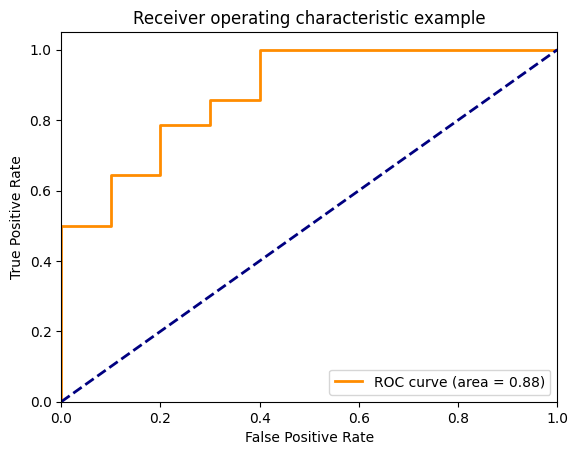

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the test set
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

**XGBOOST**

In [ ]:
import xgboost as xgb
from sklearn.metrics import log_loss
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.model_selection import cross_val_predict

In [ ]:
# Reshape preds to make it compatible for concatenation
preds_val_reshaped = preds.reshape(-1, 1)

In [ ]:
# Concatenate original features with TabNet predictions
X_val_combined = np.concatenate([X_test, preds_val_reshaped], axis=1)

In [ ]:
xgb_model = xgb.XGBClassifier(
    learning_rate=0.1,    # Further reduced learning rate
    max_depth=4,           # Further reduced tree depth
    min_child_weight=5,    # Increased to make the model even more conservative
    subsample=0.8,         # Further decreased to introduce more randomness
    colsample_bytree=0.8,  # Further decreased to introduce more randomness
    gamma=1,               # Significantly increased gamma
    alpha=0.5,             # Increased L1 regularization
    reg_lambda=1,          # Corrected parameter name for L2 regularization
    n_estimators=150      # Further reduced number of trees
)

In [ ]:
xgb_model.fit(X_train, y_train)

XGBClassifier(alpha=0.5, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
# Perform cross-validation
# cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')

# # Print the mean and standard deviation of the scores
# print("CV Mean Score: {:.2f}".format(np.mean(cv_scores)))
# print("CV Score Standard Deviation: {:.2f}".format(np.std(cv_scores)))

In [ ]:
X_val_combined = X_val_combined[:, :-1]

In [ ]:
predictions = xgb_model.predict(X_val_combined)
predictions

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1])

In [ ]:
y_test

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0])

In [ ]:
print("\n----------------------------------------------------------------------\n")
print("The Classification report: \n{}\n".format(classification_report(y_test, predictions)))
print("\n----------------------------------------------------------------------\n")
print("The Accuracy Score of TabNet+XGBoost is: {:.3f}%".format(accuracy_score(y_test, predictions)*100))


----------------------------------------------------------------------

The Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.88      1.00      0.93        14

    accuracy                           0.92        24
   macro avg       0.94      0.90      0.91        24
weighted avg       0.93      0.92      0.91        24



----------------------------------------------------------------------

The Accuracy Score of TabNet+XGBoost is: 91.667%


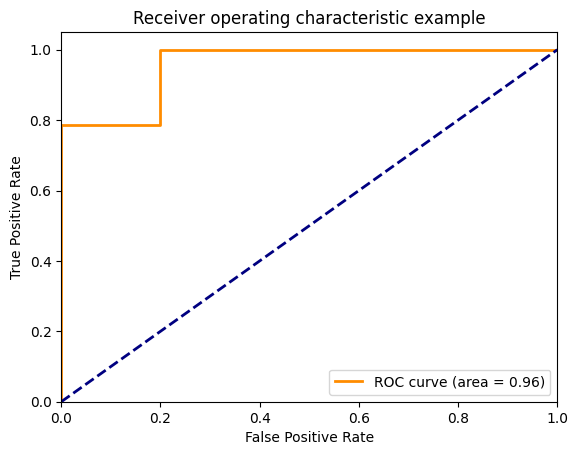

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the test set
predictions_proba = xgb_model.predict_proba(X_test)

# Extract the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predictions_proba[:, 1])

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

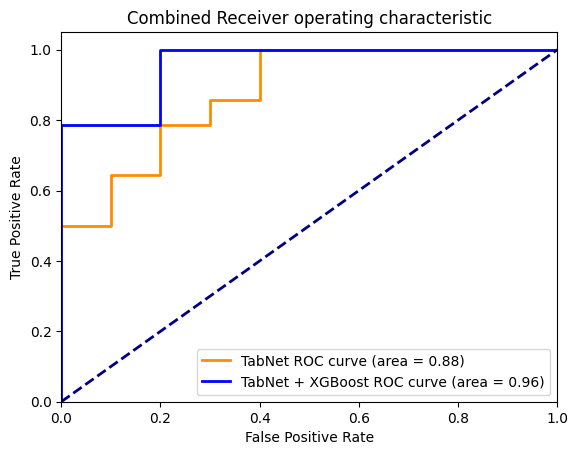

In [ ]:
import matplotlib.pyplot as plt
# **TabNet**
# Get predicted probabilities for the test set
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr_tab, tpr_tab, thresholds_tab = roc_curve(y_test, y_pred_prob)
roc_auc_tab = auc(fpr_tab, tpr_tab)

# **XGBOOST**

# Get predicted probabilities for the test set
predictions_proba = xgb_model.predict_proba(X_test)

# Extract the ROC curve
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, predictions_proba[:, 1])

# Calculate the AUC
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot both ROC curves
plt.figure()
lw = 2
plt.plot(fpr_tab, tpr_tab, color='darkorange',
         lw=lw, label='TabNet ROC curve (area = %0.2f)' % roc_auc_tab)
plt.plot(fpr_xgb, tpr_xgb, color='blue',
         lw=lw, label='TabNet + XGBoost ROC curve (area = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Combined Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


# Frontend - LLM

In [ ]:
!pip install gradio
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.78 --force-reinstall --upgrade --no-cache-dir --verbose
!pip install huggingface_hub
!pip install llama-cpp-python==0.1.78


import gradio as gr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 50.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.9/91.9 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 61.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 9.9 MB/s et

In [ ]:
model_name_or_path = "TheBloke/Llama-2-13B-chat-GGML"
model_basename = "llama-2-13b-chat.ggmlv3.q5_1.bin" # the model is in bin format

In [ ]:
from huggingface_hub import hf_hub_download
from llama_cpp import Llama

In [ ]:
model_path = hf_hub_download(repo_id=model_name_or_path, filename=model_basename)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


llama-2-13b-chat.ggmlv3.q5_1.bin:   0%|          | 0.00/9.76G [00:00<?, ?B/s]

In [ ]:
# GPU
lcpp_llm = None
lcpp_llm = Llama(
    model_path=model_path,
    n_threads=2, # CPU cores
    n_batch=512, # Should be between 1 and n_ctx, consider the amount of VRAM in the GPU.
    n_gpu_layers=32 # Change this value based on the model and GPU VRAM pool.
    )

AVX = 1 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | VSX = 0 | 


In [ ]:
def llama2(input_data):
  age = input_data['anchor_age']

  icu_duration = input_data['icu_duration']

  medication = input_data['medication']

  prompt = f''' The patient is a Male of age {age}. He has stayed in the icu for {icu_duration} days.
  He has been administered {medication} and is at a risk of contracting delirium. Give the nurse suitable methods to diagonise this to avoid or prevent delirium. Do not over explain'''
  prompt_template=f'''SYSTEM: You are a helpful, respectful and honest assistant. Always answer as helpfully. Give the answer in under 299 words and over 270 words.

  USER: {prompt}

  ASSISTANT:
  '''

  response=lcpp_llm(prompt=prompt_template, max_tokens=300, temperature=0.5, top_p=0.95,
                  repeat_penalty=1.2, top_k=150,
                  echo=True)

  dialogue = response["choices"][0]["text"]
  assistant_response = "Patient is at a risk of delirium. \n" + dialogue.split('ASSISTANT:')[1].strip()
  assistant_response = assistant_response.split('SYSTEM:')[0].strip()
  print(assistant_response)

  return assistant_response



In [ ]:
patient_history = []

def predict_model(icd_code, gender, anchor_age, icu, icu_duration, medication, frequency):
    gender = 'M' if gender == "Male" else 'F'

    input_data = pd.DataFrame({
        'icd_code': [icd_code],
        'gender': [gender],
        'anchor_age': [anchor_age],
        'icu': [icu],
        'icu_duration': [icu_duration],
        'medication': [medication],
        'frequency': [frequency]
    })

    if not patient_history:
        patient_history.append(f"Gender: {gender}, Age: {anchor_age}, icu_duration: {icu_duration}\n")
        details = f"[ICD Code: {icd_code}, Medication: {medication}, Frequency: {frequency}.] \n"
        patient_history.append(details)
    else:
        details = f"[ICD Code: {icd_code}, Medication: {medication}, Frequency: {frequency}.] \n"
        patient_history.append(details)


    input_icd_code_features = icd_vectorizer.transform(input_data['icd_code']).toarray()
    input_medication_features = med_vectorizer.transform(input_data['medication']).toarray()
    input_frequency_features = freq_vectorizer.transform(input_data['frequency']).toarray()
    input_gender_encoded = gender_encoder.transform(input_data[['gender']])


    input_all_features = np.concatenate([input_icd_code_features, input_medication_features, input_frequency_features,
                                         input_gender_encoded, input_data[['anchor_age', 'icu_duration', 'icu']].values], axis=1)

    input_all_features = scaler.transform(input_all_features)

    print(input_all_features)
    print(input_all_features.shape)

    preds = xgb_model.predict(input_all_features)
    prediction = "risk" if preds[0] > 0.5 else "No risk of delirium"
    if(prediction=="risk"):
      prediction = llama2(input_data)
    return prediction, "".join(patient_history)

#predict_model('F10234', 'Male', 50, 1, 230, 'Spironolactone', 'Q8H')

In [ ]:
# Inputs and outputs for the Gradio interface
inputs = [
    gr.Textbox(label="ICD Code", placeholder="Enter ICD Code..."),
    gr.Radio(choices=["Male", "Female"], label="Gender"),
    gr.Slider(minimum=0, maximum=100, step=1, value=50, label="Anchor Age"),
    gr.Slider(minimum=0, maximum=1, step=1, value=1, label="ICU"),
    gr.Slider(minimum=0, maximum=365, step=1, value=1, label="ICU Duration"),
    gr.Dropdown(choices=['Midazolam',
'Fentanyl Citrate',
'Lorazepam',
'Propofol',
'Lidocaine Jelly 2% (Urojet)',
'Albumin 5% (25g / 500mL)',
'Polyethylene Glycol',
'MoviPrep',
'Potassium Chloride',
'Magnesium Citrate',
'Amitriptyline',
'Latanoprost 0.005% Ophth. Soln.',
'Tamsulosin',
'Atorvastatin',
'Mirtazapine',
'Insulin',
'Simvastatin',
'Sodium Fluoride 1.1% (Dental Gel)',
'Albuterol Inhaler',
'Docusate Sodium',
'Heparin',
'LevETIRAcetam',
'Raltegravir',
'Calcium Carbonate',
'Rifaximin',
'LeVETiracetam',
'Sulfameth/Trimethoprim DS',
'Docusate Sodium (Liquid)',
'TiCAGRELOR',
'Metoprolol Tartrate',
'Darunavir',
'Mupirocin Nasal Ointment 2%',
'Chlorhexidine Gluconate 0.12% Oral Rinse',
'CloniDINE',
'Dorzolamide 2%/Timolol 0.5% Ophth.',
'Furosemide',
'ClonazePAM',
'Ranitidine',
'Docusate',
'MetFORMIN (Glucophage)',
'Methadone',
'Fish Oil (Omega 3)',
'Docusate',
'Mupirocin Ointment 2%',
'Apixaban',
'Fluticasone-Salmeterol Diskus (100/50)',
'BusPIRone',
'Omeprazole',
'Topiramate (Topamax)',
'LaMOTrigine',
'Sotalol',
'Ciprofloxacin 0.3% Ophth Soln',
'PHENObarbital Alcohol Withdrawal Dose Taper (Days 2-7)',
'Carvedilol',
'Fluticasone Propionate 110mcg',
'Divalproex (DELayed Release)',
'QUEtiapine Fumarate',
'Divalproex Sod. Sprinkles',
'Spironolactone',
'Triamcinolone Acetonide 0.025% Cream'], label="Medication"),
    gr.Dropdown(choices=['Q1H', 'Q2H', 'Q3H', 'Q4H', 'Q6H', 'Q8H', 'INFUSION'], label="Frequency")
]

#output_history = gr.Label(num_top_classes=2, label="Patient data")
#output_llm = gr.Label(num_top_classes=2, label="Prediction")

output_llm = gr.Text(label="Prediction")
output_patient_data = gr.Text(label="Patient Data")
# Creating the interface
iface = gr.Interface(fn=predict_model, inputs=inputs, outputs=[output_llm, output_patient_data], title="Delirium Prediction Model",
                     description="Input patient data to predict delirium.")

# Launching the interface
iface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://56f39a6def0a090803.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
